In [5]:
from ultralyticsplus import YOLO, render_result
import os
import PIL.Image


In [6]:
# load model
model = YOLO('ultralyticsplus/yolov8s')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 10  # maximum number of detections per image



11-14-27-19-460700.png
(330, 330)


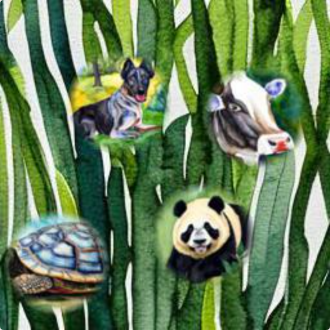


0: 640x640 2 dogs, 269.8ms
Speed: 1.0ms preprocess, 269.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


dog detected
[         73          56         158         139     0.88072          16]


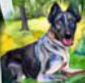

dog detected
[        165         195         248         330     0.85094          16]


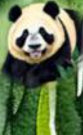

11-14-32-53-942477.png
(330, 330)


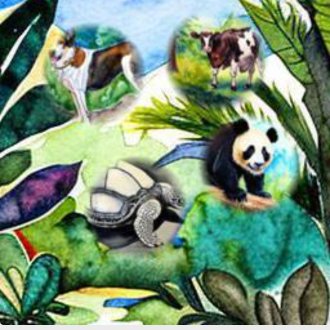


0: 640x640 2 dogs, 1 bed, 243.4ms
Speed: 1.0ms preprocess, 243.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


dog detected
[        191          26         259          91     0.72981          16]


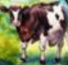

dog detected
[        149         119         277         247     0.35574          16]


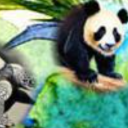

11-14-32-57-046605.png
(330, 330)


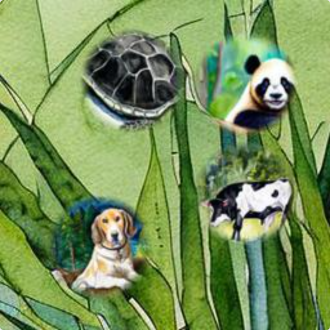


0: 640x640 1 cat, 1 dog, 1 bear, 264.3ms
Speed: 1.0ms preprocess, 264.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


dog detected
[         63         207         143         292     0.80654          16]


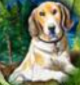

11-14-32-58-382200.png
(330, 330)


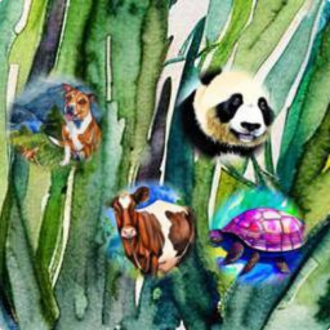


0: 640x640 1 dog, 1 teddy bear, 255.6ms
Speed: 1.0ms preprocess, 255.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


dog detected
[         60          83         102         167      0.5541          16]


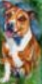

11-15-18-56-198196.png
(330, 330)


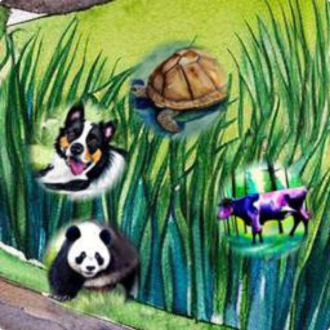


0: 640x640 1 dog, 1 cow, 1 bear, 243.2ms
Speed: 1.0ms preprocess, 243.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


dog detected
[         35          99         127         199     0.29108          16]


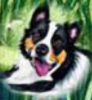

11-15-21-42-083840.png
(330, 330)


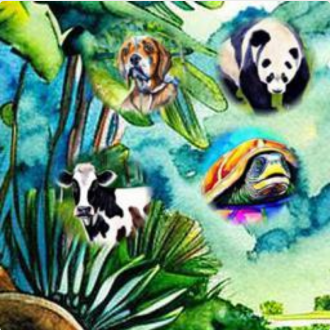


0: 640x640 1 dog, 1 bowl, 303.2ms
Speed: 2.0ms preprocess, 303.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


dog detected
[        216          17         310         113     0.85267          16]


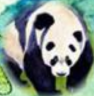

11-15-21-43-452231.png
(330, 330)


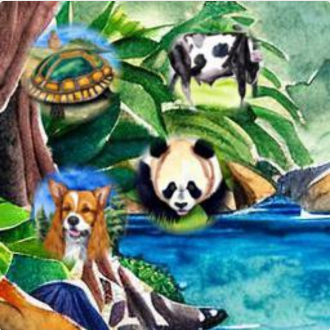


0: 640x640 1 person, 3 dogs, 263.3ms
Speed: 1.0ms preprocess, 263.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


dog detected
[         35         180         227         330     0.50479          16]


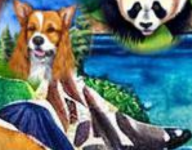

dog detected
[         42         181         120         305     0.49486          16]


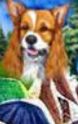

dog detected
[          0         276          84         330     0.31798          16]


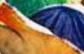

In [10]:
folder = "./src/images/v2/dog/"
paths = os.listdir(folder)
for path in paths:
    print(path)
    img = PIL.Image.open(folder+path)
    img = img.crop((85, 179, 415, 509))
    print(img.size)
    display(img)
    image = img

    results = model.predict(image)

    boxes = results[0].boxes.boxes.detach().numpy()
    #print(boxes)

    boxes = results[0].boxes.boxes.detach().numpy()
    dogs = boxes[boxes[:,-1] == 16]
    #print(dogs)
    for dog in dogs:
        print("dog detected")
        print(dog)
        display(image.crop(dog[:4]))

11-14-27-16-601327.png
(330, 330)


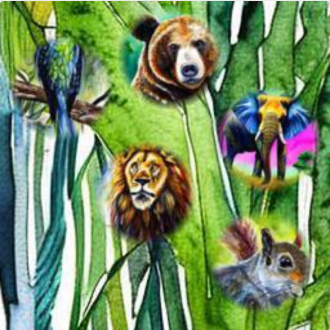


0: 640x640 3 birds, 2 dogs, 224.4ms
Speed: 1.0ms preprocess, 224.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


[[        105         144         192         329     0.58066          14]
 [        123          15         220         104     0.50483          16]
 [        215          71         319         320      0.4066          14]
 [        213         218         310         319     0.37261          14]
 [         81          13         255         328     0.26514          16]]


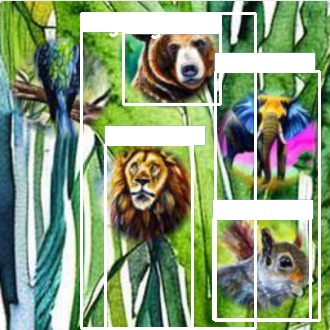

In [13]:
folder = "./src/images/v2/elephant/"
paths = os.listdir(folder)
for path in paths:
    print(path)
    path = "11-15-21-40-723712.png"
    img = PIL.Image.open(folder+path)
    img = img.crop((85, 179, 415, 509))
    print(img.size)
    display(img)
    image = img

    results = model.predict(image)

    boxes = results[0].boxes.boxes.detach().numpy()
    elephants = boxes[boxes[:,-1] == 20]
    print(boxes)
    if len(elephants) > 0:
        print("elephant detected")
        print(elephants)
        display(image.crop(elephants[0][:4]))

    horses = boxes[boxes[:,-1] == 17]
    if len(horses) > 0:
        print("horse detected")
        print(horses)
        display(image.crop(horses[0][:4]))

    render = render_result(model=model, image=image, result=results[0])

    display(render)
    break